1. Read the data as an appropriate Time Series data and plot the data.

In [1]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")
import statsmodels.tsa.holtwinters as ets
import statsmodels.tools.eval_measures as fa
from sklearn.metrics import  mean_squared_error
from sklearn import metrics
from datetime import datetime
from pandas import datetime
from statsmodels.tsa.holtwinters import  SimpleExpSmoothing, Holt, ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from IPython.display import Markdown, display

C:\Users\Sanjana\AppData\Local\Temp\ipykernel_14096\2698558087.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
sparkling_df = pd.read_csv("Sparkling.csv", parse_dates= True, index_col= 'YearMonth')
sparkling_df.head()

,Sparkling
YearMonth,
1980-01-01,1686
1980-02-01,1591
1980-03-01,2304
1980-04-01,1712
1980-05-01,1471


In [3]:
rose_df = pd.read_csv("Rose.csv", parse_dates= True, index_col= 'YearMonth')
rose_df.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [4]:
sparkling_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [5]:
rose_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [6]:
from pylab import rcParams

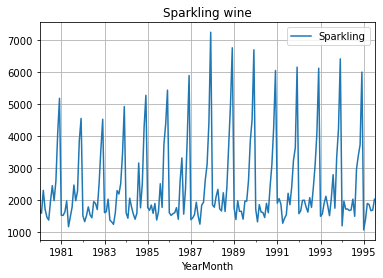

In [7]:
sparkling_df.plot(grid = True);
plt.title("Sparkling wine");

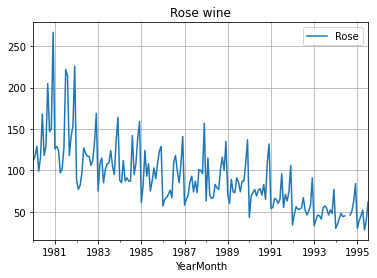

In [8]:
rose_df.plot(grid = True);
plt.title("Rose wine");

2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [9]:
display(round(sparkling_df.describe(),3))
display(round(rose_df.describe(),3))

,Sparkling
count,187.000
mean,2402.417
std,1295.112
min,1070.000
25%,1605.000
50%,1874.000
75%,2549.000
max,7242.000


,Rose
count,185.000
mean,90.395
std,39.175
min,28.000
25%,63.000
50%,86.000
75%,112.000
max,267.000


In [10]:
display(sparkling_df.isna().sum())
sparkling_df.shape

Sparkling    0
dtype: int64

(187, 1)

In [11]:
display(rose_df.isna().sum())

Rose    2
dtype: int64

In [12]:
rose_df.fillna(method = 'bfill', inplace=True)
display(rose_df.isna().sum())
rose_df.shape

Rose    0
dtype: int64

(187, 1)

In [13]:
sparkling_df1 = sparkling_df.copy()
sparkling_df1['Year'] = sparkling_df1.index.year
sparkling_df1['Month'] = sparkling_df1.index.month
display(sparkling_df1.head())

,Sparkling,Year,Month
YearMonth,,,
1980-01-01,1686,1980,1
1980-02-01,1591,1980,2
1980-03-01,2304,1980,3
1980-04-01,1712,1980,4
1980-05-01,1471,1980,5


In [14]:
rose_df1 = rose_df.copy()
rose_df1['Year'] = rose_df1.index.year
rose_df1['Month'] = rose_df1.index.month
display(rose_df1.head())

,Rose,Year,Month
YearMonth,,,
1980-01-01,112.0,1980,1
1980-02-01,118.0,1980,2
1980-03-01,129.0,1980,3
1980-04-01,99.0,1980,4
1980-05-01,116.0,1980,5


Text(0.5, 1.0, 'Monthly Boxplot for all the years for Sparkling Dataset:')

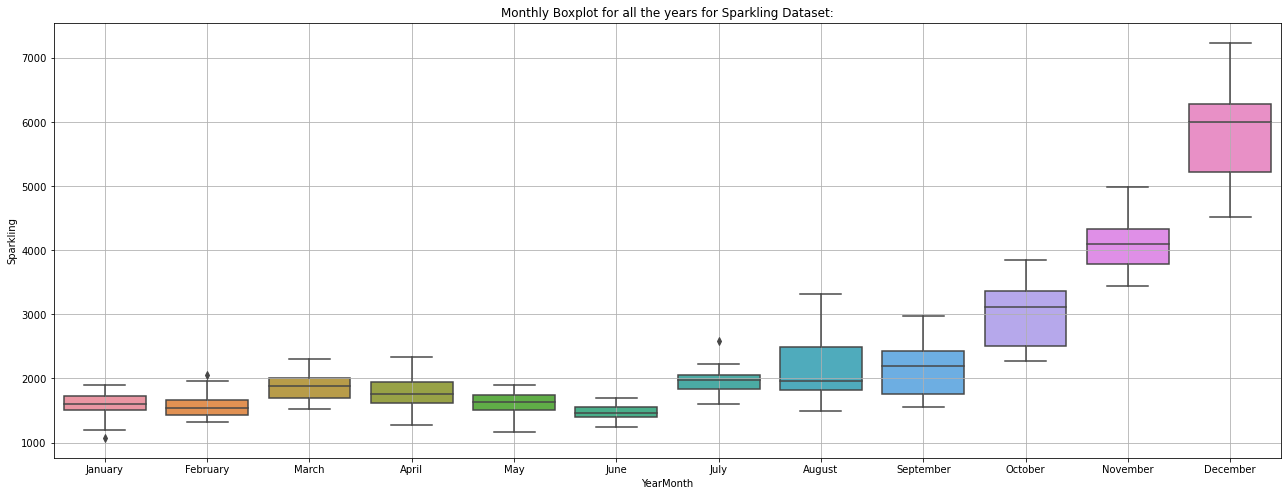

In [15]:
plt.subplots(figsize=(22,8))
sns.boxplot(x = sparkling_df1.index.month_name(),y = sparkling_df1.Sparkling);
plt.grid();
plt.title('Monthly Boxplot for all the years for Sparkling Dataset:')

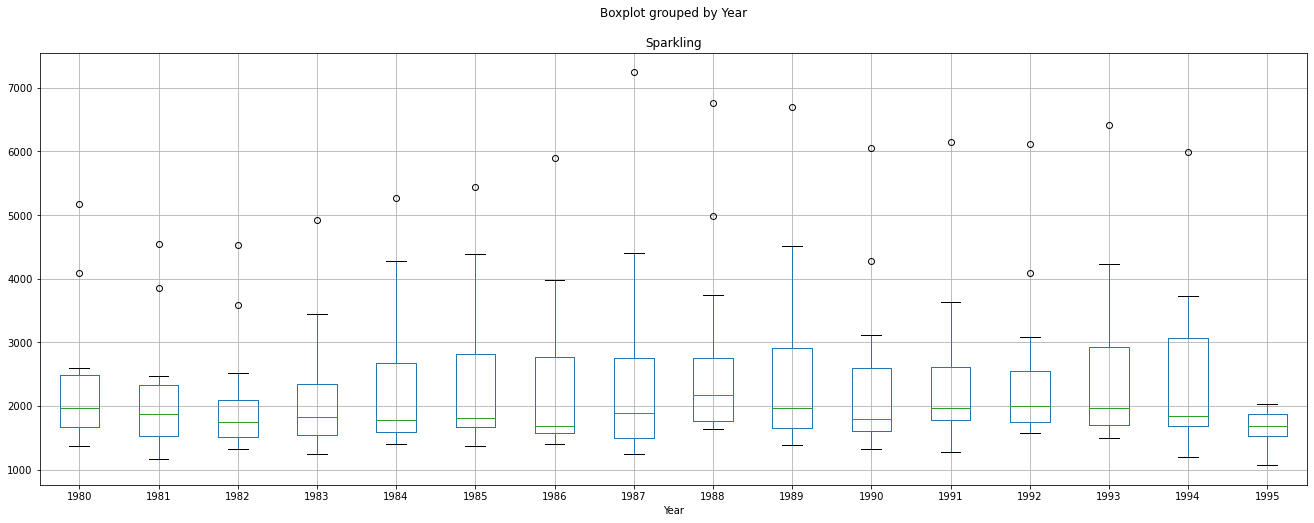

In [16]:
ax=sparkling_df1.boxplot('Sparkling', by= 'Year',figsize=(22,8));
plt.show()

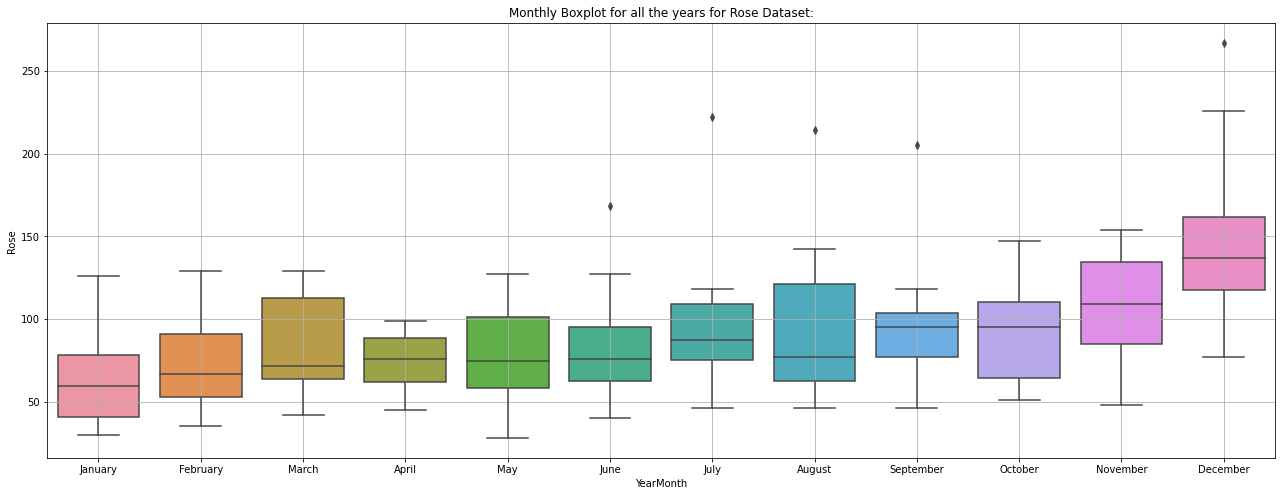

In [17]:
plt.subplots(figsize=(22,8))
sns.boxplot(x = rose_df1.index.month_name(),y = rose_df1.Rose);
plt.grid();
plt.title('Monthly Boxplot for all the years for Rose Dataset:');

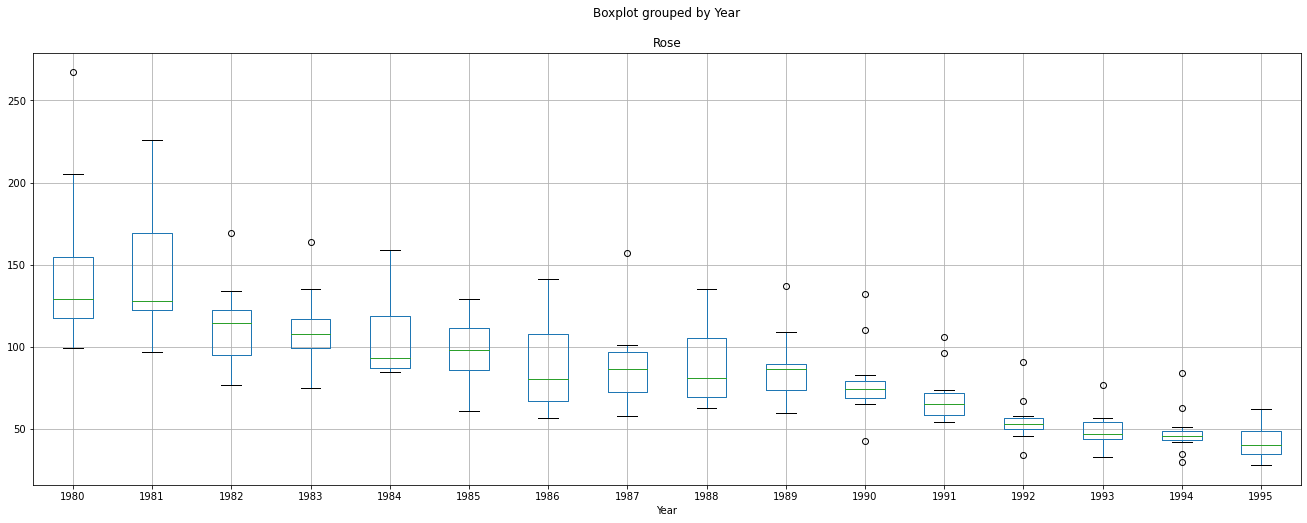

In [18]:
rose_df1.boxplot('Rose', by= 'Year',figsize=(22,8));

In [19]:
print("Sparkling data monthly mean aggregate, year-wise")
sparkling_df1.pivot_table(values = 'Sparkling', index = 'Year', aggfunc='mean', columns = 'Month')

Sparkling data monthly mean aggregate, year-wise


Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1980,1686.0,1591.0,2304.0,1712.0,1471.0,1377.0,1966.0,2453.0,1984.0,2596.0,4087.0,5179.0
1981,1530.0,1523.0,1633.0,1976.0,1170.0,1480.0,1781.0,2472.0,1981.0,2273.0,3857.0,4551.0
1982,1510.0,1329.0,1518.0,1790.0,1537.0,1449.0,1954.0,1897.0,1706.0,2514.0,3593.0,4524.0
1983,1609.0,1638.0,2030.0,1375.0,1320.0,1245.0,1600.0,2298.0,2191.0,2511.0,3440.0,4923.0
1984,1609.0,1435.0,2061.0,1789.0,1567.0,1404.0,1597.0,3159.0,1759.0,2504.0,4273.0,5274.0
1985,1771.0,1682.0,1846.0,1589.0,1896.0,1379.0,1645.0,2512.0,1771.0,3727.0,4388.0,5434.0
1986,1606.0,1523.0,1577.0,1605.0,1765.0,1403.0,2584.0,3318.0,1562.0,2349.0,3987.0,5891.0
1987,1389.0,1442.0,1548.0,1935.0,1518.0,1250.0,1847.0,1930.0,2638.0,3114.0,4405.0,7242.0
1988,1853.0,1779.0,2108.0,2336.0,1728.0,1661.0,2230.0,1645.0,2421.0,3740.0,4988.0,6757.0


In [20]:
print("Rose data monthly mean aggregate, year-wise")
rose_df1.pivot_table(values = 'Rose', index = 'Year', aggfunc='mean', columns = 'Month')

Rose data monthly mean aggregate, year-wise


Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
1980,112.0,118.0,129.0,99.0,116.0,168.0,118.0,129.0,205.0,147.0,150.0,267.0
1981,126.0,129.0,124.0,97.0,102.0,127.0,222.0,214.0,118.0,141.0,154.0,226.0
1982,89.0,77.0,82.0,97.0,127.0,121.0,117.0,117.0,106.0,112.0,134.0,169.0
1983,75.0,108.0,115.0,85.0,101.0,108.0,109.0,124.0,105.0,95.0,135.0,164.0
1984,88.0,85.0,112.0,87.0,91.0,87.0,87.0,142.0,95.0,108.0,139.0,159.0
1985,61.0,82.0,124.0,93.0,108.0,75.0,87.0,103.0,90.0,108.0,123.0,129.0
1986,57.0,65.0,67.0,71.0,76.0,67.0,110.0,118.0,99.0,85.0,107.0,141.0
1987,58.0,65.0,70.0,86.0,93.0,74.0,87.0,73.0,101.0,100.0,96.0,157.0
1988,63.0,115.0,70.0,66.0,67.0,83.0,79.0,77.0,102.0,116.0,100.0,135.0


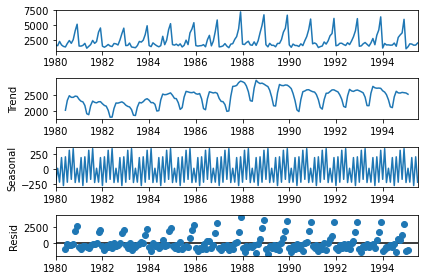

In [21]:
#additive decompose - Sparkling
decompose_sparkling = seasonal_decompose(sparkling_df, model='additive', period=10)
ax=decompose_sparkling.plot()
plt.show()

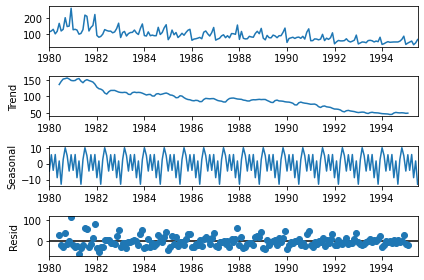

In [22]:
#additive decompose-Rose
decompose_rose = seasonal_decompose(rose_df, model='additive', period=10)
ax=decompose_rose.plot()
plt.show()

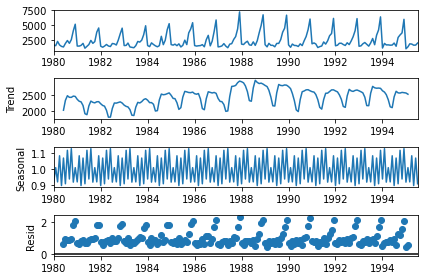

In [23]:
#multiplicative decompose-Sparkling
decompose_sparkling = seasonal_decompose(sparkling_df, model='multiplicative', period=10)
ax=decompose_sparkling.plot()
plt.show()

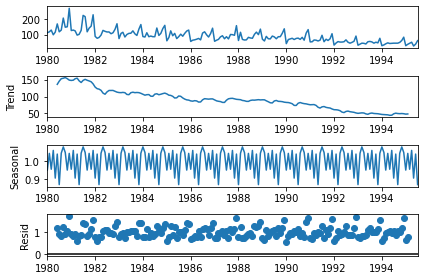

In [24]:
#multiplicative decompose-Rose
decompose_rose = seasonal_decompose(rose_df, model='multiplicative', period=10)
ax=decompose_rose.plot()
plt.show()

3. Split the data into training and test. The test data should start in 1991.

In [25]:
train_sparkling = sparkling_df1[sparkling_df1['Year'] < 1991]
test_sparkling = sparkling_df1[sparkling_df1['Year'] > 1990]
display(train_sparkling.tail())
print("Train Data:",train_sparkling.shape)
display(test_sparkling.head())
print("Test Data:", test_sparkling.shape)

,Sparkling,Year,Month
YearMonth,,,
1990-08-01,1605,1990,8
1990-09-01,2424,1990,9
1990-10-01,3116,1990,10
1990-11-01,4286,1990,11
1990-12-01,6047,1990,12


Train Data: (132, 3)


,Sparkling,Year,Month
YearMonth,,,
1991-01-01,1902,1991,1
1991-02-01,2049,1991,2
1991-03-01,1874,1991,3
1991-04-01,1279,1991,4
1991-05-01,1432,1991,5


Test Data: (55, 3)


In [26]:
train_rose = rose_df1[rose_df1['Year'] < 1991]
test_rose = rose_df1[rose_df1['Year'] > 1990]
display(train_rose.tail())
print("Train Data:", train_rose.shape)
display(test_rose.head())
print("Test Data:", test_rose.shape)

,Rose,Year,Month
YearMonth,,,
1990-08-01,70.0,1990,8
1990-09-01,83.0,1990,9
1990-10-01,65.0,1990,10
1990-11-01,110.0,1990,11
1990-12-01,132.0,1990,12


Train Data: (132, 3)


,Rose,Year,Month
YearMonth,,,
1991-01-01,54.0,1991,1
1991-02-01,55.0,1991,2
1991-03-01,66.0,1991,3
1991-04-01,65.0,1991,4
1991-05-01,60.0,1991,5


Test Data: (55, 3)


4. Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

In [27]:
## Model 1: Linear Regression

In [28]:
train_time = [i+1 for i in range(len(train_sparkling))]
test_time = [i+133 for i in range(len(test_sparkling))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [29]:
train_sparkling.shape

(132, 3)

In [30]:
LR_train_sparkling = train_sparkling.copy()
LR_test_sparkling = test_sparkling.copy()

LR_train_sparkling['time'] = train_time
LR_test_sparkling['time'] = test_time

display(LR_train_sparkling.head())
display(LR_test_sparkling.head())

,Sparkling,Year,Month,time
YearMonth,,,,
1980-01-01,1686,1980,1,1
1980-02-01,1591,1980,2,2
1980-03-01,2304,1980,3,3
1980-04-01,1712,1980,4,4
1980-05-01,1471,1980,5,5


,Sparkling,Year,Month,time
YearMonth,,,,
1991-01-01,1902,1991,1,133
1991-02-01,2049,1991,2,134
1991-03-01,1874,1991,3,135
1991-04-01,1279,1991,4,136
1991-05-01,1432,1991,5,137


In [31]:
train_time1 = [i+1 for i in range(len(train_rose))]   #rose data
test_time1 = [i+133 for i in range(len(test_rose))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [32]:
LR_train_rose = train_rose.copy()
LR_test_rose = test_rose.copy()

LR_train_rose['time'] = train_time1
LR_test_rose['time'] = test_time1

display(LR_train_rose.head())
display(LR_test_rose.head())

,Rose,Year,Month,time
YearMonth,,,,
1980-01-01,112.0,1980,1,1
1980-02-01,118.0,1980,2,2
1980-03-01,129.0,1980,3,3
1980-04-01,99.0,1980,4,4
1980-05-01,116.0,1980,5,5


,Rose,Year,Month,time
YearMonth,,,,
1991-01-01,54.0,1991,1,133
1991-02-01,55.0,1991,2,134
1991-03-01,66.0,1991,3,135
1991-04-01,65.0,1991,4,136
1991-05-01,60.0,1991,5,137


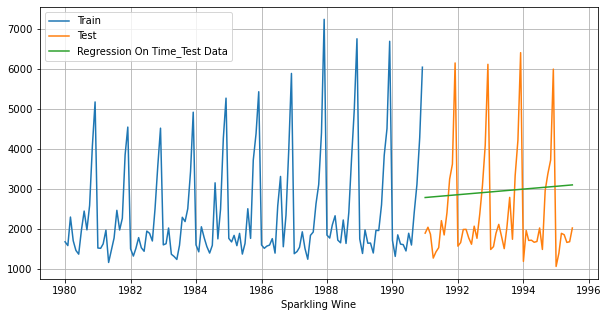

In [33]:
#regression on sparkling
lr_spark = LinearRegression()
lr_spark.fit(LR_train_sparkling[['time']], LR_train_sparkling['Sparkling'])



#train_predictions_model1         = lr_spark.predict(LR_test_sparkling[['time']])
#LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr_spark.predict(LR_test_sparkling[['time']])
LR_test_sparkling['Reg_sparkling'] = test_predictions_model1

plt.figure(figsize= (10,5))
plt.plot(train_sparkling['Sparkling'], label='Train')
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(LR_test_sparkling['Reg_sparkling'], label='Regression On Time_Test Data')
plt.xlabel("Sparkling Wine")
plt.legend(loc='best')
plt.grid();

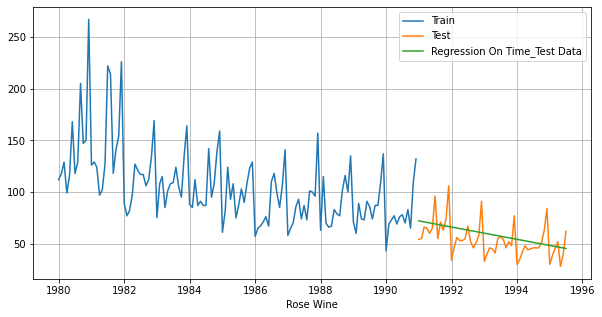

In [34]:
#regression on rose
lr_rose = LinearRegression()
lr_rose.fit(LR_train_rose[['time']], LR_train_rose['Rose'])



#train_predictions_model1         = lr_spark.predict(LR_test_sparkling[['time']])
#LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model11         = lr_rose.predict(LR_test_rose[['time']])
LR_test_rose['Reg_rose'] = test_predictions_model11

plt.figure(figsize= (10,5))
plt.plot(train_rose['Rose'], label='Train')
plt.plot(test_rose['Rose'], label='Test')
plt.plot(LR_test_rose['Reg_rose'], label='Regression On Time_Test Data')
plt.xlabel("Rose Wine")
plt.legend(loc='best')
plt.grid();

In [35]:
#evaluation

rmse_model1_test = metrics.mean_squared_error(LR_test_sparkling['Sparkling'],test_predictions_model1,squared=False)
#print("For RegressionOnTime forecast on the Test Data for Sparkling Wine,  RMSE is %3.3f " %(rmse_model1_test))


rmse_model11_test = metrics.mean_squared_error(LR_test_rose['Rose'],test_predictions_model11,squared=False)
#print("For RegressionOnTime forecast on the Test Data for Rose Wine,  RMSE is %3.3f " %(rmse_model11_test))

Spark_resultsDf = pd.DataFrame({'Test_Spark RMSE': [rmse_model1_test]},index=['Regression'])
Rose_resultsDf = pd.DataFrame({'Test_Rose RMSE': [rmse_model11_test]},index=['Regression'])

display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175


,Test_Rose RMSE
Regression,15.262509


In [36]:
## Model 2: Naive Approach

In [37]:
Naive_train_sparkling = train_sparkling.copy()
Naive_test_sparkling = test_sparkling.copy()

Naive_train_rose = train_rose.copy()
Naive_test_rose = test_rose.copy()

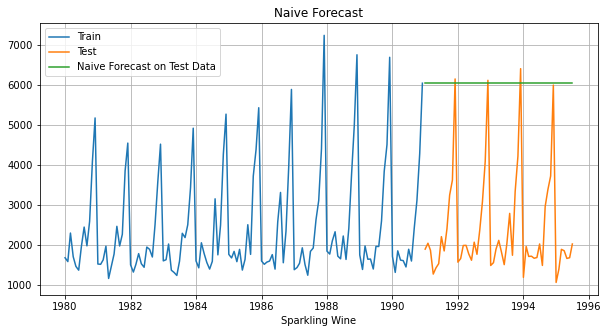

In [38]:
Naive_test_sparkling['naive'] = np.asarray(Naive_train_sparkling['Sparkling'])[len(np.asarray(Naive_train_sparkling['Sparkling']))-1]
#display(Naive_test_sparkling.head())

plt.figure(figsize= (10,5))
plt.plot(Naive_train_sparkling['Sparkling'], label='Train')
plt.plot(Naive_test_sparkling['Sparkling'], label='Test')
plt.plot(Naive_test_sparkling['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Naive Forecast")
plt.grid();

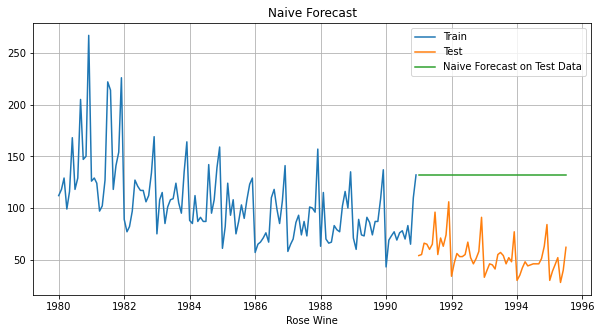

In [39]:
Naive_test_rose['naive'] = np.asarray(Naive_train_rose['Rose'])[len(np.asarray(Naive_train_rose['Rose']))-1]
#display(Naive_test_rose.head())

plt.figure(figsize= (10,5))
plt.plot(Naive_train_rose['Rose'], label='Train')
plt.plot(Naive_test_rose['Rose'], label='Test')

plt.plot(Naive_test_rose['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("Naive Forecast")
plt.grid();

In [40]:
#evaluation

rmse_model2_test = metrics.mean_squared_error(Naive_test_sparkling['Sparkling'],Naive_test_sparkling['naive'],squared=False)


rmse_model22_test = metrics.mean_squared_error(Naive_test_rose['Rose'],Naive_test_rose['naive'],squared=False)


Spark_resultsDf_2 = pd.DataFrame({'Test_Spark RMSE': [rmse_model2_test]},index=['NaiveModel'])
Rose_resultsDf2 = pd.DataFrame({'Test_Rose RMSE': [rmse_model22_test]},index=['NaiveModel'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf_2])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf2])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093


In [41]:
## Method 3: Simple Average

In [42]:
SimpleAvg_train_sparkling = train_sparkling.copy()
SimpleAvg_test_sparkling = test_sparkling.copy()

SimpleAvg_train_rose = train_rose.copy()
SimpleAvg_test_rose = test_rose.copy()

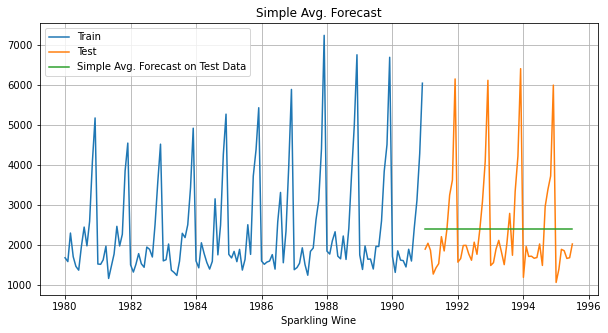

In [43]:
SimpleAvg_test_sparkling['Mean Forecast'] = SimpleAvg_train_sparkling['Sparkling'].mean()
SimpleAvg_test_rose['Mean Forecast'] = SimpleAvg_train_rose['Rose'].mean()

plt.figure(figsize= (10,5))
plt.plot(SimpleAvg_train_sparkling['Sparkling'], label='Train')
plt.plot(SimpleAvg_test_sparkling['Sparkling'], label='Test')
plt.plot(SimpleAvg_test_sparkling['Mean Forecast'], label='Simple Avg. Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Simple Avg. Forecast")
plt.grid();

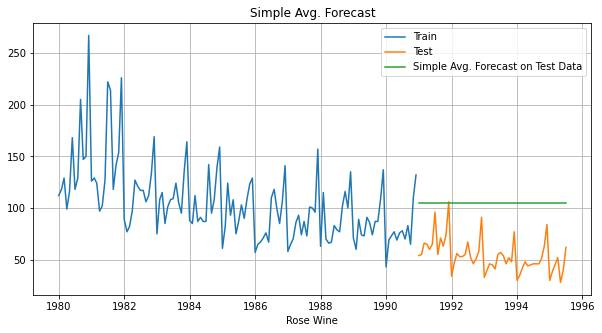

In [44]:
plt.figure(figsize= (10,5))
plt.plot(SimpleAvg_train_rose['Rose'], label='Train')
plt.plot(SimpleAvg_test_rose['Rose'], label='Test')
plt.plot(SimpleAvg_test_rose['Mean Forecast'], label='Simple Avg. Forecast on Test Data')
plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("Simple Avg. Forecast")
plt.grid();

In [45]:
#evaluation

rmse_model3_test = metrics.mean_squared_error(SimpleAvg_test_sparkling['Sparkling'],SimpleAvg_test_sparkling['Mean Forecast'],squared=False)


rmse_model33_test = metrics.mean_squared_error(SimpleAvg_test_rose['Rose'],SimpleAvg_test_rose['Mean Forecast'],squared=False)


Spark_resultsDf3 = pd.DataFrame({'Test_Spark RMSE': [rmse_model3_test]},index=['SimpleAvg'])
Rose_resultsDf3 = pd.DataFrame({'Test_Rose RMSE': [rmse_model33_test]},index=['SimpleAvg'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf3])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf3])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426


In [46]:
## Method 4: Moving Average(MA)

In [47]:
MA_sparkling = sparkling_df1.copy()
MA_sparkling['Trailing_2'] = MA_sparkling['Sparkling'].rolling(2).mean()
MA_sparkling['Trailing_4'] = MA_sparkling['Sparkling'].rolling(4).mean()
MA_sparkling['Trailing_6'] = MA_sparkling['Sparkling'].rolling(6).mean()
MA_sparkling['Trailing_9'] = MA_sparkling['Sparkling'].rolling(9).mean()

MA_sparkling.head(10)

,Sparkling,Year,Month,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,,
1980-01-01,1686,1980,1,NaN,NaN,NaN,NaN
1980-02-01,1591,1980,2,1638.5,NaN,NaN,NaN
1980-03-01,2304,1980,3,1947.5,NaN,NaN,NaN
1980-04-01,1712,1980,4,2008.0,1823.25,NaN,NaN
1980-05-01,1471,1980,5,1591.5,1769.50,NaN,NaN
1980-06-01,1377,1980,6,1424.0,1716.00,1690.166667,NaN
1980-07-01,1966,1980,7,1671.5,1631.50,1736.833333,NaN
1980-08-01,2453,1980,8,2209.5,1816.75,1880.500000,NaN
1980-09-01,1984,1980,9,2218.5,1945.00,1827.166667,1838.222222


In [48]:
MA_rose = rose_df1.copy()
MA_rose['Trailing_2'] = MA_rose['Rose'].rolling(2).mean()
MA_rose['Trailing_4'] = MA_rose['Rose'].rolling(4).mean()
MA_rose['Trailing_6'] = MA_rose['Rose'].rolling(6).mean()
MA_rose['Trailing_9'] = MA_rose['Rose'].rolling(9).mean()

MA_rose.head(10)

,Rose,Year,Month,Trailing_2,Trailing_4,Trailing_6,Trailing_9
YearMonth,,,,,,,
1980-01-01,112.0,1980,1,NaN,NaN,NaN,NaN
1980-02-01,118.0,1980,2,115.0,NaN,NaN,NaN
1980-03-01,129.0,1980,3,123.5,NaN,NaN,NaN
1980-04-01,99.0,1980,4,114.0,114.50,NaN,NaN
1980-05-01,116.0,1980,5,107.5,115.50,NaN,NaN
1980-06-01,168.0,1980,6,142.0,128.00,123.666667,NaN
1980-07-01,118.0,1980,7,143.0,125.25,124.666667,NaN
1980-08-01,129.0,1980,8,123.5,132.75,126.500000,NaN
1980-09-01,205.0,1980,9,167.0,155.00,139.166667,132.666667


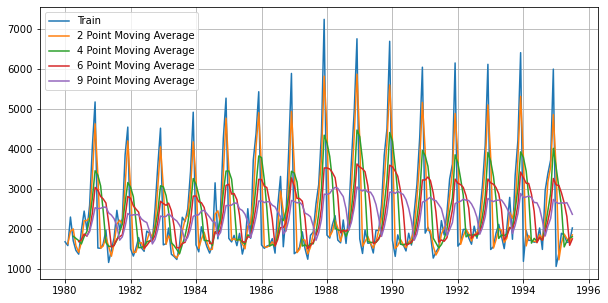

In [49]:
## Plotting on the whole Sparkling wine data

plt.figure(figsize= (10,5))
plt.plot(MA_sparkling['Sparkling'], label='Train')
plt.plot(MA_sparkling['Trailing_2'], label='2 Point Moving Average')
plt.plot(MA_sparkling['Trailing_4'], label='4 Point Moving Average')
plt.plot(MA_sparkling['Trailing_6'], label ='6 Point Moving Average')
plt.plot(MA_sparkling['Trailing_9'], label ='9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

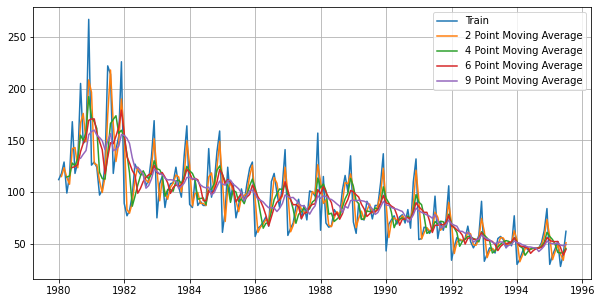

In [50]:
## Plotting on the whole Rose wine data

plt.figure(figsize= (10,5))
plt.plot(MA_rose['Rose'], label='Train')
plt.plot(MA_rose['Trailing_2'], label='2 Point Moving Average')
plt.plot(MA_rose['Trailing_4'], label='4 Point Moving Average')
plt.plot(MA_rose['Trailing_6'], label ='6 Point Moving Average')
plt.plot(MA_rose['Trailing_9'], label ='9 Point Moving Average')

plt.legend(loc = 'best')
plt.grid();

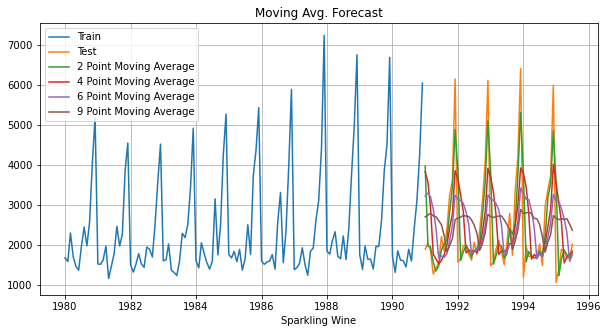

In [51]:
train_MA_spark = MA_sparkling[MA_sparkling['Year'] < 1991]
test_MA_spark = MA_sparkling[MA_sparkling['Year'] > 1990]

plt.figure(figsize= (10,5))
plt.plot(train_MA_spark['Sparkling'], label='Train')
plt.plot(test_MA_spark['Sparkling'], label='Test')
plt.plot(test_MA_spark['Trailing_2'], label='2 Point Moving Average')
plt.plot(test_MA_spark['Trailing_4'], label='4 Point Moving Average')
plt.plot(test_MA_spark['Trailing_6'], label ='6 Point Moving Average')
plt.plot(test_MA_spark['Trailing_9'], label ='9 Point Moving Average')

plt.legend(loc = 'best')
plt.xlabel("Sparkling Wine")
plt.title("Moving Avg. Forecast")
plt.grid();

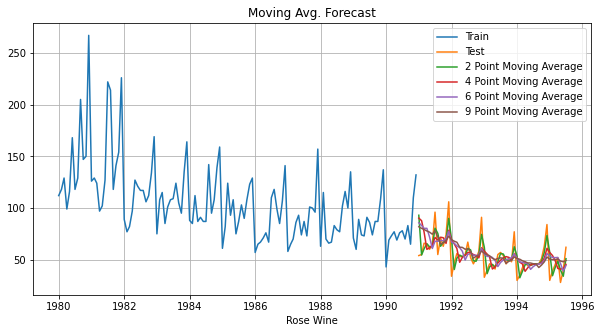

In [52]:
train_MA_rose = MA_rose[MA_rose['Year'] < 1991]
test_MA_rose = MA_rose[MA_rose['Year'] > 1990]

plt.figure(figsize= (10,5))
plt.plot(train_MA_rose['Rose'], label='Train')
plt.plot(test_MA_rose['Rose'], label='Test')
plt.plot(test_MA_rose['Trailing_2'], label='2 Point Moving Average')
plt.plot(test_MA_rose['Trailing_4'], label='4 Point Moving Average')
plt.plot(test_MA_rose['Trailing_6'], label ='6 Point Moving Average')
plt.plot(test_MA_rose['Trailing_9'], label ='9 Point Moving Average')

plt.legend(loc = 'best')
plt.xlabel("Rose Wine")
plt.title("Moving Avg. Forecast")
plt.grid();


In [53]:
rmse_model4_test_2 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_2'],squared=False)
rmse_model4_test_4 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_4'],squared=False)
rmse_model4_test_6 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_6'],squared=False)
rmse_model4_test_9 = metrics.mean_squared_error(test_MA_spark['Sparkling'],test_MA_spark['Trailing_9'],squared=False)



rmse_model44_test_2 = metrics.mean_squared_error(test_MA_rose['Rose'],test_MA_rose['Trailing_2'],squared=False)
rmse_model44_test_4 = metrics.mean_squared_error(test_MA_rose['Rose'],test_MA_rose['Trailing_4'],squared=False)
rmse_model44_test_6 = metrics.mean_squared_error(test_MA_rose['Rose'],test_MA_rose['Trailing_6'],squared=False)
rmse_model44_test_9 = metrics.mean_squared_error(test_MA_rose['Rose'],test_MA_rose['Trailing_9'],squared=False)


Spark_resultsDf4 = pd.DataFrame({'Test_Spark RMSE': [rmse_model4_test_2,rmse_model4_test_4, rmse_model4_test_6, rmse_model4_test_9]},
                                index=['MovingAvg2','MovingAvg4', 'MovingAvg6', 'MovingAvg9' ])
Rose_resultsDf4 = pd.DataFrame({'Test_Rose RMSE': [rmse_model44_test_2,rmse_model44_test_4, rmse_model44_test_6, rmse_model44_test_9]},
                                index=['MovingAvg2','MovingAvg4', 'MovingAvg6', 'MovingAvg9'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf4])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf4])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503


In [54]:
## Exponential Smoothing methods

In [55]:
## Simple Exponential Smoothing (SES)

In [56]:
SES_train_sparkling = train_sparkling.copy()   #SES model
SES_test_sparkling = test_sparkling.copy()

SES_train_rose = train_rose.copy()
SES_test_rose = test_rose.copy()

In [57]:
model_SES_spark = SimpleExpSmoothing(SES_train_sparkling['Sparkling'])
model_SES_autofit_spark = model_SES_spark.fit(optimized=True)
display(model_SES_autofit_spark.params)

SES_predict_spark = model_SES_autofit_spark.forecast(steps=len(SES_test_sparkling))


model_SES_rose = SimpleExpSmoothing(SES_train_rose['Rose'])
model_SES_autofit_rose = model_SES_rose.fit(optimized=True)
display(model_SES_autofit_rose.params)

SES_predict_rose = model_SES_autofit_rose.forecast(steps=len(SES_test_rose))

{'smoothing_level': 0.049607360581862936,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1818.535750008871,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

Text(0.5, 1.0, 'Alpha = 0.0 Predictions')

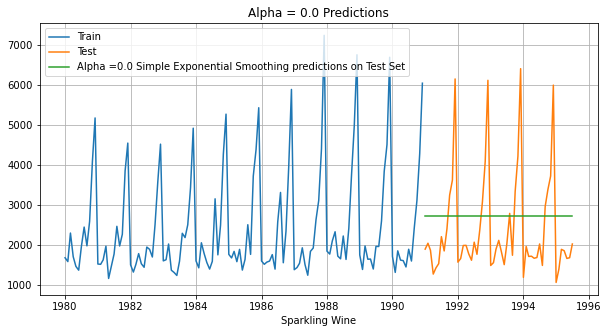

In [58]:
plt.figure(figsize= (10,5))
plt.plot(SES_train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(SES_test_sparkling['Sparkling'], label='Test')

plt.plot(SES_predict_spark, label='Alpha =0.0 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.grid()
plt.title('Alpha = 0.0 Predictions')

Text(0.5, 1.0, 'Alpha = 0.09 Predictions')

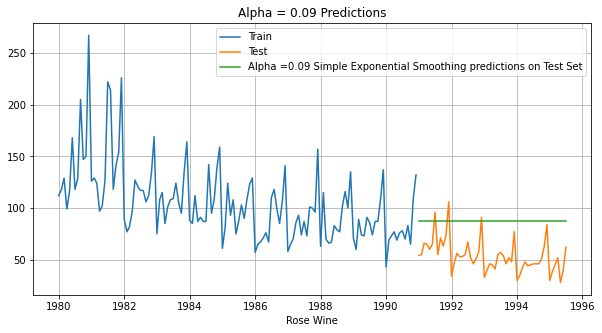

In [59]:
plt.figure(figsize= (10,5))
plt.plot(SES_train_rose['Rose'], label='Train') #sparkling data
plt.plot(SES_test_rose['Rose'], label='Test')

plt.plot(SES_predict_rose, label='Alpha =0.09 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.grid()
plt.title('Alpha = 0.09 Predictions')

In [60]:
#evaluation

rmse_model5_test = metrics.mean_squared_error(SES_predict_spark, SES_test_sparkling['Sparkling'],squared=False)


rmse_model55_test = metrics.mean_squared_error(SES_predict_rose, SES_test_rose['Rose'],squared=False)


Spark_resultsDf5 = pd.DataFrame({'Test_Spark RMSE': [rmse_model5_test]},index=['SES'])
Rose_resultsDf5 = pd.DataFrame({'Test_Rose RMSE': [rmse_model55_test]},index=['SES'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf5])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf5])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.035487


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775774


In [61]:
## Double Exponential Smoothing

In [62]:
DES_train_sparkling = train_sparkling.copy()   #DES model
DES_test_sparkling = test_sparkling.copy()

DES_train_rose = train_rose.copy()
DES_test_rose = test_rose.copy()

In [63]:
model_DES_spark = Holt(DES_train_sparkling['Sparkling'])
model_DES_autofit_spark = model_DES_spark.fit(optimized=True)
display(model_DES_autofit_spark.params)

DES_predict_spark = model_DES_autofit_spark.forecast(steps=len(DES_test_sparkling))


model_DES_rose = Holt(DES_train_rose['Rose'])
model_DES_autofit_rose = model_DES_rose.fit(optimized=True)
display(model_DES_autofit_rose.params)

DES_predict_rose = model_DES_autofit_rose.forecast(steps=len(DES_test_rose))

{'smoothing_level': 0.6885714285714285,
 'smoothing_trend': 9.999999999999999e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1686.0,
 'initial_trend': -95.0,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

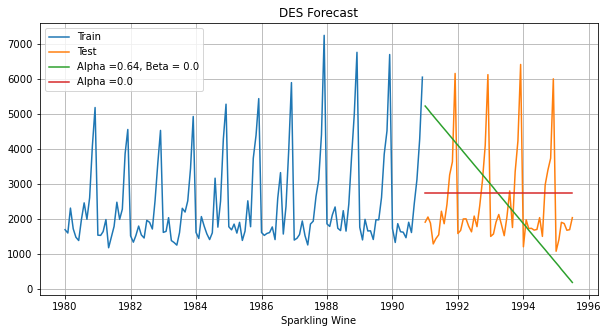

In [64]:
plt.figure(figsize= (10,5))
plt.plot(DES_train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(DES_test_sparkling['Sparkling'], label='Test')
plt.plot(DES_predict_spark, label='Alpha =0.64, Beta = 0.0')
plt.plot(SES_predict_spark, label='Alpha =0.0')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("DES Forecast")
plt.grid()

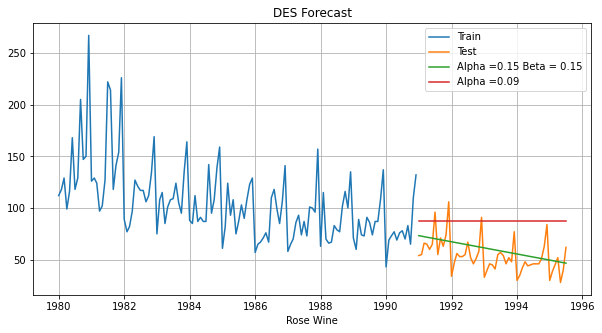

In [65]:
plt.figure(figsize= (10,5))
plt.plot(DES_train_rose['Rose'], label='Train') #sparkling data
plt.plot(DES_test_rose['Rose'], label='Test')
plt.plot(DES_predict_rose, label='Alpha =0.15 Beta = 0.15')
plt.plot(SES_predict_rose, label='Alpha =0.09')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("DES Forecast")
plt.grid()

In [66]:
#evaluation

rmse_model6_test = metrics.mean_squared_error(DES_predict_spark, DES_test_sparkling['Sparkling'],squared=False)


rmse_model66_test = metrics.mean_squared_error(DES_predict_rose, DES_test_rose['Rose'],squared=False)


Spark_resultsDf6 = pd.DataFrame({'Test_Spark RMSE': [rmse_model6_test]},index=['DES'])
Rose_resultsDf66 = pd.DataFrame({'Test_Rose RMSE': [rmse_model66_test]},index=['DES'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf6])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf66])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.035487
DES,2007.238526


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775774
DES,15.699312


Inference Here, we see that the Double Exponential Smoothing model has picked up the trend component as well. Our data has seasonlity too so we will include one more smoothing parameter for seasonality which is gamma.
We will use ETS(A, A, A) Holt Winter's linear method with additive trend and seasonality for Sparkling data and ETS(A, A, M) Holt Winter's linear method with additive trend and multiplicative seasonality for Rose wine data

In [67]:
TES_train_sparkling = train_sparkling.copy()   #TES model
TES_test_sparkling = test_sparkling.copy()

TES_train_rose = train_rose.copy()
TES_test_rose = test_rose.copy()

In [68]:
model_TES_spark = ExponentialSmoothing(TES_train_sparkling['Sparkling'], trend='additive', seasonal='additive')
model_TES_autofit_spark = model_TES_spark.fit(optimized=True)
display(model_TES_autofit_spark.params)

TES_predict_spark = model_TES_autofit_spark.forecast(steps=len(TES_test_sparkling))


model_TES_rose = ExponentialSmoothing(TES_train_rose['Rose'], trend='additive', seasonal= 'multiplicative')
model_TES_autofit_rose = model_TES_rose.fit(optimized=True)
display(model_TES_autofit_rose.params)

TES_predict_rose = model_TES_autofit_rose.forecast(steps=len(TES_test_rose))

{'smoothing_level': 0.11127227248079453,
 'smoothing_trend': 0.012360804305088534,
 'smoothing_seasonal': 0.46071766688111543,
 'damping_trend': nan,
 'initial_level': 2356.577980956387,
 'initial_trend': -0.10243675533021725,
 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
        -808.42473284, -815.34991402, -384.23065038,   72.99484403,
        -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

{'smoothing_level': 0.0715106306609405,
 'smoothing_trend': 0.04529179757535142,
 'smoothing_seasonal': 7.244325029450242e-05,
 'damping_trend': nan,
 'initial_level': 130.40839142502193,
 'initial_trend': -0.77985743179386,
 'initial_seasons': array([0.86218996, 0.977675  , 1.0687727 , 0.93403881, 1.050625  ,
        1.14410977, 1.25836944, 1.33937772, 1.26778766, 1.24131254,
        1.44724625, 1.99553681]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

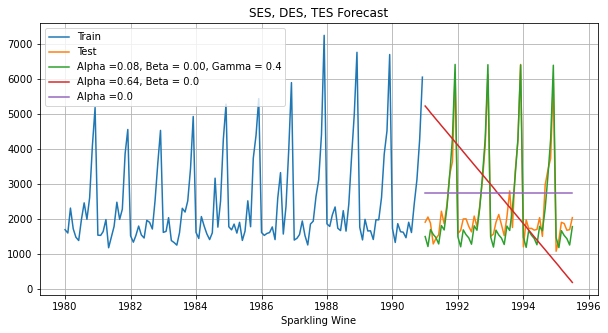

In [69]:
plt.figure(figsize= (10,5))
plt.plot(TES_train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(TES_test_sparkling['Sparkling'], label='Test')
plt.plot(TES_predict_spark, label='Alpha =0.08, Beta = 0.00, Gamma = 0.4' )
plt.plot(DES_predict_spark, label='Alpha =0.64, Beta = 0.0')
plt.plot(SES_predict_spark, label='Alpha =0.0')


plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("SES, DES, TES Forecast")
plt.grid()

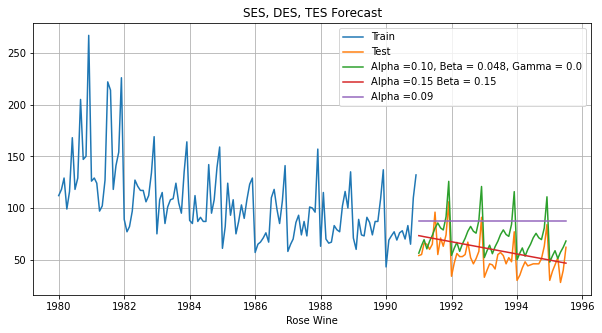

In [70]:
plt.figure(figsize= (10,5))
plt.plot(TES_train_rose['Rose'], label='Train') #sparkling data
plt.plot(TES_test_rose['Rose'], label='Test')
plt.plot(TES_predict_rose, label='Alpha =0.10, Beta = 0.048, Gamma = 0.0' )
plt.plot(DES_predict_rose, label='Alpha =0.15 Beta = 0.15')
plt.plot(SES_predict_rose, label='Alpha =0.09')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("SES, DES, TES Forecast")
plt.grid()

In [71]:
#evaluation

rmse_model0_test = metrics.mean_squared_error(TES_predict_spark, TES_test_sparkling['Sparkling'],squared=False)
rmse_model00_test = metrics.mean_squared_error(TES_predict_rose, TES_test_rose['Rose'],squared=False)

Spark_resultsDf0 = pd.DataFrame({'Test_Spark RMSE': [rmse_model0_test]},index=['TES'])
Rose_resultsDf00 = pd.DataFrame({'Test_Rose RMSE': [rmse_model00_test]},index=['TES'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf0])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf00])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.035487
DES,2007.238526
TES,378.951023


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775774
DES,15.699312
TES,20.132468


5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

In [72]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(sparkling_df)

print('DF test statistic for Sparkling dataset %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

dftest = adfuller(rose_df)

print('DF test statistic for Rose dataset %3.3f' %dftest[0])
print('DF test p-value is %1.4f' %dftest[1])

DF test statistic for Sparkling dataset -1.360
DF test p-value is 0.6011
DF test statistic for Rose dataset -1.877
DF test p-value is 0.3427


In [73]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=6).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=6).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='green', label='Rolling Mean')
    std = plt.plot(rolstd, color='orange', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

Sparkling Train$Test:



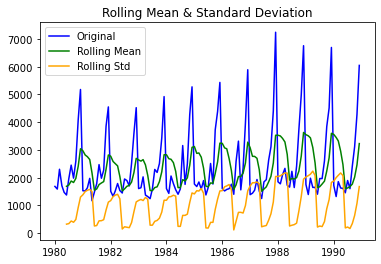

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



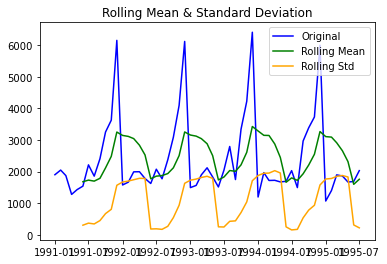

Results of Dickey-Fuller Test:
Test Statistic                 -1.790189
p-value                         0.385343
#Lags Used                     11.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64 



In [74]:
print("Sparkling Train$Test:\n")
ax = test_stationarity(train_sparkling['Sparkling'])
ax1 = test_stationarity(test_sparkling['Sparkling'])

Rose Train$Test:



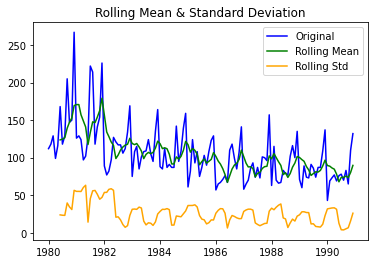

Results of Dickey-Fuller Test:
Test Statistic                  -2.164250
p-value                          0.219476
#Lags Used                      13.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64 



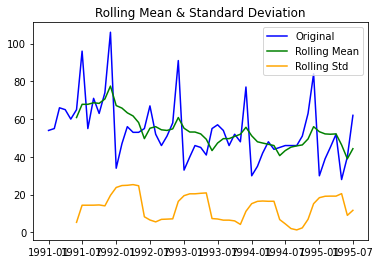

Results of Dickey-Fuller Test:
Test Statistic                 -4.464772
p-value                         0.000228
#Lags Used                     11.000000
Number of Observations Used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64 



In [75]:
print("Rose Train$Test:\n")
ax = test_stationarity(train_rose['Rose'])
ax1 = test_stationarity(test_rose['Rose'])

Differenced Sparkling Data:



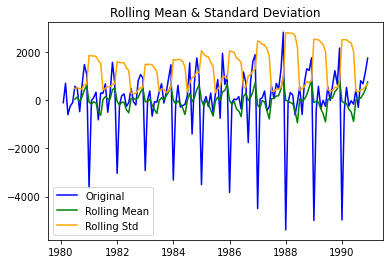

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



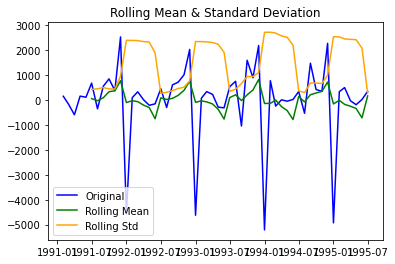

Results of Dickey-Fuller Test:
Test Statistic                -7.050414e+00
p-value                        5.545252e-10
#Lags Used                     1.100000e+01
Number of Observations Used    4.200000e+01
Critical Value (1%)           -3.596636e+00
Critical Value (5%)           -2.933297e+00
Critical Value (10%)          -2.604991e+00
dtype: float64 



In [76]:
print("Differenced Sparkling Data:\n")
ax = test_stationarity((train_sparkling['Sparkling']).diff().dropna())
ax1 = test_stationarity((test_sparkling['Sparkling']).diff().dropna())

Differenced Rose Data:



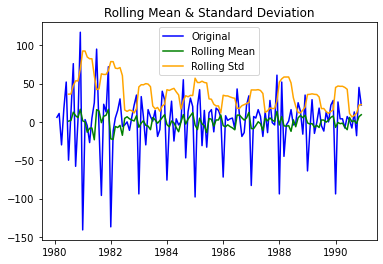

Results of Dickey-Fuller Test:
Test Statistic                -6.592372e+00
p-value                        7.061944e-09
#Lags Used                     1.200000e+01
Number of Observations Used    1.180000e+02
Critical Value (1%)           -3.487022e+00
Critical Value (5%)           -2.886363e+00
Critical Value (10%)          -2.580009e+00
dtype: float64 



In [77]:
print("Differenced Rose Data:\n")
ax = test_stationarity((train_rose['Rose']).diff().dropna())
#ax1 = test_stationarity((test_rose['']).diff().dropna())

6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [78]:
## ARIMA

In [79]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [80]:
from statsmodels.tsa.arima.model import ARIMA
ARIMA_AIC_sp = pd.DataFrame(columns=['param', 'AIC_Sparkling'])
for param in pdq:
    ARIMA_model_s = ARIMA(train_sparkling['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_s.aic))
    ARIMA_AIC_sp = ARIMA_AIC_sp.append({'param':param, 'AIC_Sparkling': ARIMA_model_s.aic}, ignore_index=True)
display(ARIMA_AIC_sp.sort_values(by='AIC_Sparkling',ascending=True))


ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323131676
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.5272004508324
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263084434
ARIMA(2, 1, 2) - AIC:2213.5092122831566


,param,AIC_Sparkling
8,"(2, 1, 2)",2213.509212
7,"(2, 1, 1)",2233.777626
2,"(0, 1, 2)",2234.408323
5,"(1, 1, 2)",2234.5272
4,"(1, 1, 1)",2235.755095
6,"(2, 1, 0)",2260.365744
1,"(0, 1, 1)",2263.060016
3,"(1, 1, 0)",2266.608539
0,"(0, 1, 0)",2267.663036


In [81]:
from statsmodels.tsa.arima.model import ARIMA
ARIMA_AIC_ro = pd.DataFrame(columns=['param', 'AIC_Rose'])
for param in pdq:
    ARIMA_model_r = ARIMA(train_rose['Rose'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model_r.aic))
    ARIMA_AIC_ro = ARIMA_AIC_ro.append({'param':param, 'AIC_Rose': ARIMA_model_r.aic}, ignore_index=True)
display(ARIMA_AIC_ro.sort_values(by='AIC_Rose',ascending=True))

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535806
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380064
ARIMA(1, 1, 2) - AIC:1279.8707234231922
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868543
ARIMA(2, 1, 2) - AIC:1281.8707222264356


,param,AIC_Rose
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.57423
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722
1,"(0, 1, 1)",1282.309832
6,"(2, 1, 0)",1298.611034
3,"(1, 1, 0)",1317.350311
0,"(0, 1, 0)",1333.154673


In [82]:
## The smallest AIC for Sparkling dataset is given by the model (2,1,2) while for Rose dataset is given by the model (0,1,2)

In [83]:
auto_ARIMA_s = ARIMA(train_sparkling['Sparkling'], order=(2,1,2))

results_auto_ARIMA_s = auto_ARIMA_s.fit()

print("Sparkling Data:\n", results_auto_ARIMA_s.summary())

Sparkling Data:
                                SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Mon, 19 Dec 2022   AIC                           2213.509
Time:                        10:38:36   BIC                           2227.885
Sample:                    01-01-1980   HQIC                          2219.351
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.781      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.741      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109   

In [84]:
auto_ARIMA_r = ARIMA((train_rose['Rose']).diff().dropna(), order=(0,1,2))

results_auto_ARIMA_r = auto_ARIMA_r.fit()

print("Rose Data:\n", results_auto_ARIMA_r.summary())

Rose Data:
                                SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  131
Model:                 ARIMA(0, 1, 2)   Log Likelihood                -637.781
Date:                Mon, 19 Dec 2022   AIC                           1281.561
Time:                        10:38:36   BIC                           1290.164
Sample:                    02-01-1980   HQIC                          1285.057
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.9931      0.452     -4.408      0.000      -2.879      -1.107
ma.L2          0.9965      0.453      2.201      0.028       0.109       1.884
sigma2       962.1823    421.444      2.

In [85]:
from sklearn.metrics import mean_squared_error
predicted_auto_ARIMA_s = results_auto_ARIMA_s.forecast(steps=len(test_sparkling))
predicted_auto_ARIMA_r = results_auto_ARIMA_r.forecast(steps=len(test_rose))



rmse_model7_test = mean_squared_error(predicted_auto_ARIMA_s, test_sparkling['Sparkling'],squared=False)
rmse_model77_test = metrics.mean_squared_error(predicted_auto_ARIMA_r, test_rose['Rose'],squared=False)


Spark_resultsDf7 = pd.DataFrame({'Test_Spark RMSE': [rmse_model7_test]},index=[' Auto ARIMA (2,1,2)'])
Rose_resultsDf77 = pd.DataFrame({'Test_Rose RMSE': [rmse_model77_test]},index=['Auto ARIMA (0,1,2)'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf7])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf77])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.035487
DES,2007.238526
TES,378.951023


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775774
DES,15.699312
TES,20.132468


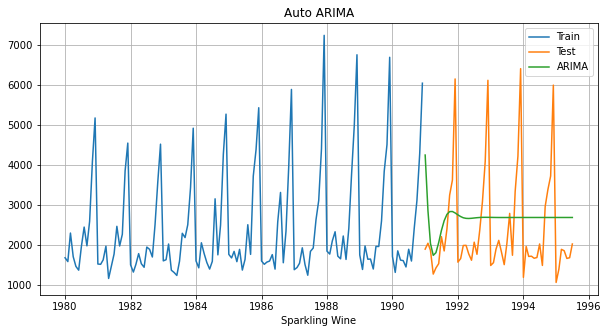

In [86]:
pred_ARIMA = pd.DataFrame({'Pred': predicted_auto_ARIMA_s}, index = test_sparkling.index)
plt.figure(figsize= (10,5))
plt.plot(train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(pred_ARIMA, label='ARIMA')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Auto ARIMA")
plt.grid()

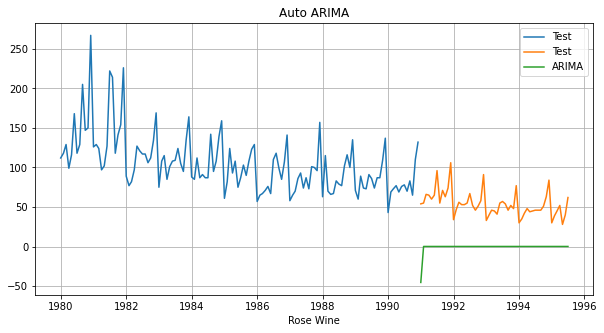

In [87]:
pred_ARIMA_Rose = pd.DataFrame({'Pred': predicted_auto_ARIMA_r}, index = test_rose.index)
plt.figure(figsize= (10,5))
plt.plot(train_rose['Rose'], label='Test') #sparkling data
plt.plot(test_rose['Rose'], label='Test')
plt.plot(pred_ARIMA_Rose, label='ARIMA')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("Auto ARIMA")
plt.grid()

7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

In [88]:
## ARIMA

<Figure size 720x360 with 0 Axes>

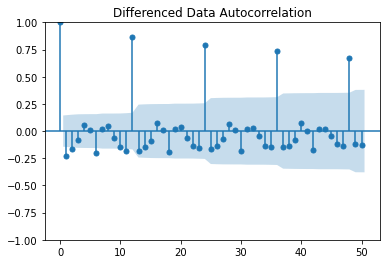

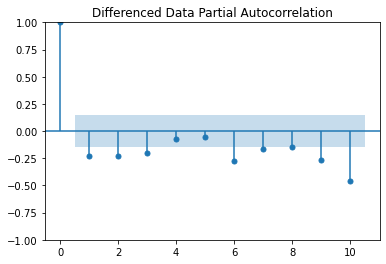

In [89]:
plt.figure(figsize= (10,5))
plot_acf(sparkling_df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(sparkling_df['Sparkling'].diff().dropna(),lags=10,title='Differenced Data Partial Autocorrelation')
plt.show()

<Figure size 1440x720 with 0 Axes>

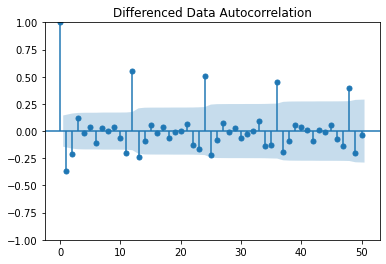

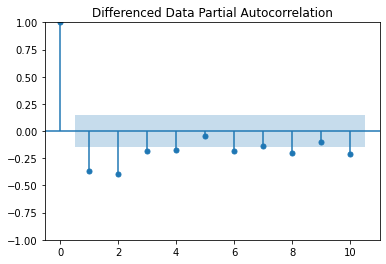

In [90]:
plt.figure(figsize= (20,10))
plot_acf(rose_df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(rose_df['Rose'].diff().dropna(),lags=10,title='Differenced Data Partial Autocorrelation')
plt.show()

Here, we have taken alpha=0.05.

The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0. The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots for Sparkling data, we can say that both the PACF cuts off at 3 and ACF plot cuts-off at lag 2.

By looking at the above plots for Rose data, we can say that PACF cuts off at 4 and ACF plot cuts-off at lag 2.

In [91]:
manual_ARIMA_s = ARIMA(train_sparkling['Sparkling'], order=(3,1,2))

results_manual_ARIMA_s = manual_ARIMA_s.fit()

print("Sparkling Data:\n", results_manual_ARIMA_s.summary())

Sparkling Data:
                                SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -1109.476
Date:                Mon, 19 Dec 2022   AIC                           2230.952
Time:                        10:38:39   BIC                           2248.204
Sample:                    01-01-1980   HQIC                          2237.962
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4155      0.043     -9.746      0.000      -0.499      -0.332
ar.L2          0.3242      0.120      2.704      0.007       0.089       0.559
ar.L3         -0.2603      0.077   

In [92]:
manual_ARIMA_r = ARIMA(train_rose['Rose'], order=(4,1,2))

results_manual_ARIMA_r = manual_ARIMA_r.fit()

print("Rose:\n", results_manual_ARIMA_r.summary())

Rose:
                                SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -635.859
Date:                Mon, 19 Dec 2022   AIC                           1285.718
Time:                        10:38:40   BIC                           1305.845
Sample:                    01-01-1980   HQIC                          1293.896
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3838      0.923     -0.416      0.677      -2.192       1.425
ar.L2          0.0046      0.258      0.018      0.986      -0.502       0.511
ar.L3          0.0414      0.113      0.366  

In [93]:
predicted_manual_ARIMA_s = results_manual_ARIMA_s.forecast(steps=len(test_sparkling))
predicted_manual_ARIMA_r = results_manual_ARIMA_r.forecast(steps=len(test_rose))


#rmse = mean_squared_error(test['RetailSales'],predicted_auto_ARIMA[0],squared=False)
#print(rmse)





rmse_model8_test = metrics.mean_squared_error(predicted_manual_ARIMA_s, test_sparkling['Sparkling'],squared=False)


rmse_model88_test = metrics.mean_squared_error(predicted_manual_ARIMA_r, test_rose['Rose'],squared=False)


Spark_resultsDf8 = pd.DataFrame({'Test_Spark RMSE': [rmse_model8_test]},index=['Manual ARIMA (3,1,2)'])
Rose_resultsDf88 = pd.DataFrame({'Test_Rose RMSE': [rmse_model88_test]},index=['Manual ARIMA (4,1,2)'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf8])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf88])


display(Spark_resultsDf)
display(Rose_resultsDf)

,Test_Spark RMSE
Regression,1389.135175
NaiveModel,3864.279352
SimpleAvg,1275.081804
MovingAvg2,813.400684
MovingAvg4,1156.589694
MovingAvg6,1283.927428
MovingAvg9,1346.278315
SES,1316.035487
DES,2007.238526
TES,378.951023


,Test_Rose RMSE
Regression,15.262509
NaiveModel,79.699093
SimpleAvg,53.440426
MovingAvg2,11.529409
MovingAvg4,14.448930
MovingAvg6,14.560046
MovingAvg9,14.724503
SES,36.775774
DES,15.699312
TES,20.132468


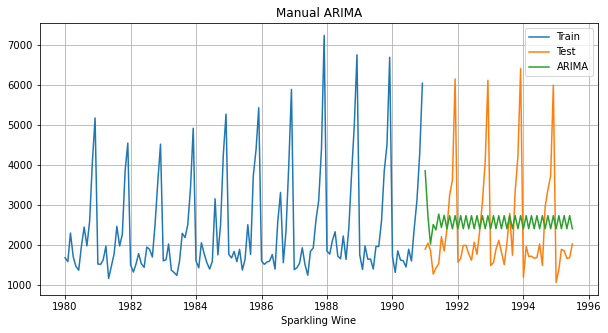

In [94]:
pred_ARIMA_manual = pd.DataFrame({'Pred': predicted_manual_ARIMA_s}, index = test_sparkling.index)
plt.figure(figsize= (10,5))
plt.plot(train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(pred_ARIMA_manual, label='ARIMA')

plt.legend(loc='best')
plt.xlabel("Sparkling Wine")
plt.title("Manual ARIMA")
plt.grid()

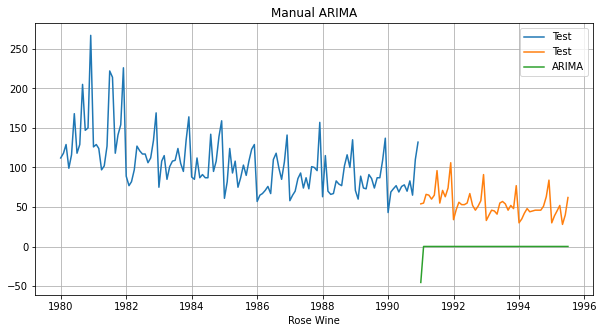

In [95]:
pred_ARIMA_Rose_manual = pd.DataFrame({'Pred': predicted_manual_ARIMA_r}, index = test_rose.index)
plt.figure(figsize= (10,5))
plt.plot(train_rose['Rose'], label='Test') #sparkling data
plt.plot(test_rose['Rose'], label='Test')
plt.plot(pred_ARIMA_Rose, label='ARIMA')

plt.legend(loc='best')
plt.xlabel("Rose Wine")
plt.title("Manual ARIMA")
plt.grid()

In [96]:
## SARIMA 

From the ACF plot we see a significant seasonal correlation after every 11th interval Setting the seasonality as 12 for the first iteration of the auto SARIMA model.

In [97]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [98]:
# Creating an empty Dataframe with column names only  
SARIMA_AIC_s = pd.DataFrame(columns=['param', 'seasonal','AIC_Sparkling'])
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_s = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_s = SARIMA_model_s.fit(maxiter=1000)
        SARIMA_AIC_s = SARIMA_AIC_s.append({'param':param,'seasonal':param_seasonal ,'AIC_Sparkling': results_SARIMA_s.aic}, ignore_index=True)
        
display(SARIMA_AIC_s.sort_values(by='AIC_Sparkling',ascending=True))

,param,seasonal,AIC_Sparkling
115,"(1, 1, 3)","(0, 0, 3, 12)",16.0
51,"(0, 1, 3)","(0, 0, 3, 12)",591.111768
252,"(3, 1, 3)","(3, 0, 0, 12)",1387.497014
220,"(3, 1, 1)","(3, 0, 0, 12)",1387.788331
237,"(3, 1, 2)","(3, 0, 1, 12)",1388.602616
...,...,...,...
19,"(0, 1, 1)","(0, 0, 3, 12)",7427.391419
3,"(0, 1, 0)","(0, 0, 3, 12)",7441.156432
195,"(3, 1, 0)","(0, 0, 3, 12)",7503.735447
131,"(2, 1, 0)","(0, 0, 3, 12)",7504.526807


In [113]:
SARIMA_AIC_r = pd.DataFrame(columns=['param', 'seasonal','AIC_Rose'])
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_r = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_r = SARIMA_model_r.fit(maxiter=1000)
        #print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_r = SARIMA_AIC_r.append({'param':param,'seasonal':param_seasonal ,'AIC_Rose': results_SARIMA_r.aic}, ignore_index=True)
        
display(SARIMA_AIC_r.sort_values(by='AIC_Rose',ascending=True))

KeyboardInterrupt: 

In [ ]:
auto_SARIMA_s = sm.tsa.statespace.SARIMAX(train_sparkling['Sparkling'].values,
                                            order=(3,1,2),
                                            seasonal_order=(3,0,0,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
results_auto_SARIMA_s = auto_SARIMA_s.fit(maxiter=1000)
        

print(results_auto_SARIMA_s.summary())  

In [ ]:
auto_SARIMA_r = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=(3,1,1),
                                            seasonal_order=(3,0,2,11),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
results_auto_SARIMA_r = auto_SARIMA_r.fit(maxiter=1000)
        

print(results_auto_SARIMA_r.summary())

In [ ]:
predicted_auto_SARIMA_s = results_auto_SARIMA_s.forecast(steps=len(test_sparkling))
predicted_auto_SARIMA_r = results_auto_SARIMA_r.forecast(steps=len(test_rose))


#rmse = mean_squared_error(test['RetailSales'],predicted_auto_ARIMA[0],squared=False)
#print(rmse)





rmse_model9_test = metrics.mean_squared_error(predicted_auto_SARIMA_s, test_sparkling['Sparkling'],squared=False)


rmse_model99_test = metrics.mean_squared_error(predicted_auto_SARIMA_r, test_rose['Rose'],squared=False)


Spark_resultsDf9 = pd.DataFrame({'Test_Spark RMSE': [rmse_model9_test]},index=[' Auto SARIMA (3,1,2)(3,0,0,12)'])
Rose_resultsDf99 = pd.DataFrame({'Test_Rose RMSE': [rmse_model99_test]},index=['Auto SARIMA (3,1,1)(3,0,2,12)'])

Spark_resultsDf = pd.concat([Spark_resultsDf, Spark_resultsDf9])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf99])


display(Spark_resultsDf)
display(Rose_resultsDf)

In [ ]:
plt.figure(figsize = (100,100));
ax = results_auto_SARIMA_s.plot_diagnostics();
ax1 = results_auto_SARIMA_r.plot_diagnostics();
plt.show();

AIC for sparkling data is the lowest for the model (3,1,2), also we saw the from ACF and PACG plots that the cut off of p and q are at 3 and 2 resp. so we conclude that the auto SARIMAX and the manual SARIMAX models are the same.

For Rose data let's build a model at the p and q cut off at 4, 2 respectively.

In [ ]:
manual_SARIMA_r = sm.tsa.statespace.SARIMAX(train_rose['Rose'].values,
                                            order=(4,1,2),
                                            seasonal_order=(3,0,2,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
results_manual_SARIMA_r = manual_SARIMA_r.fit(maxiter=1000)
        

print(results_manual_SARIMA_r.summary())

In [ ]:
predicted_manual_SARIMA_r = results_manual_SARIMA_r.forecast(steps=len(test_rose))
rmse_model999_test = metrics.mean_squared_error(predicted_manual_SARIMA_r, test_rose['Rose'],squared=False)

Rose_resultsDf999 = pd.DataFrame({'Test_Rose RMSE': [rmse_model999_test]},index=['Manual SARIMA (4,1,2)(3,0,2,12)'])
Rose_resultsDf = pd.concat([Rose_resultsDf, Rose_resultsDf999])
display(Rose_resultsDf)

8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [ ]:
model_TES_spark_fulldata = ExponentialSmoothing(sparkling_df['Sparkling'], trend='additive', seasonal='additive')
model_TES_autofit_spark_fulldata = model_TES_spark_fulldata.fit(optimized=True)
display(model_TES_autofit_spark_fulldata.params)

TES_predict_spark_fulldata = model_TES_autofit_spark_fulldata.forecast(steps=12)

In [ ]:
#TES_predict_spark_fulldata
Sparkling_forecast = pd.DataFrame({'Sparkling Forecast': TES_predict_spark_fulldata})
date = pd.date_range(start='8/1/1995', end='8/1/1996', freq='M')
Sparkling_forecast['Time'] = date
Sparkling_forecast.set_index('Time',inplace=True)



std = Sparkling_forecast['Sparkling Forecast'].std()
se = (1.96*std)/np.sqrt(len(Sparkling_forecast))



Sparkling_forecast['lower CI']= Sparkling_forecast['Sparkling Forecast'] - se
Sparkling_forecast['upper CI']= Sparkling_forecast['Sparkling Forecast'] + se
Sparkling_forecast                                                       

In [ ]:
plt.figure(figsize= (10,5))
plt.plot(train_sparkling['Sparkling'], label='Train') #sparkling data
plt.plot(test_sparkling['Sparkling'], label='Test')
plt.plot(Sparkling_forecast['Sparkling Forecast'], label='Forecast TES')

plt.legend(loc='best')
plt.xlabel('Sparkling Data')
plt.grid()

In [ ]:
Sparkling_forecast['Year'] = Sparkling_forecast.index.year
Sparkling_forecast['Month'] = Sparkling_forecast.index.month

sns.barplot(x = Sparkling_forecast['Year'], y = Sparkling_forecast['Sparkling Forecast'], hue= Sparkling_forecast['Month'])
plt.legend(loc = 'upper right')
plt.show()

For Rose dataset rolling avg shows the best RMSE, however since the window chosen was very small(2,4,6,9) it was natural it was going to work well on Test set. The other model which gave the best RMSE was TES and Manual SARIMAX (4,1,2)(3,0,2,12). We will built a final model on the entire Rose dataset using SARIMAX

In [ ]:
manual_SARIMA_fullrosedata = sm.tsa.statespace.SARIMAX(rose_df['Rose'].values,
                                            order=(4,1,2),
                                            seasonal_order=(3,0,2,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
results_manual_fullrosedata = manual_SARIMA_fullrosedata.fit(maxiter=1000)
        

#print(results_manual_SARIMA_fullrosedata.summary()) 

predicted_manual_SARIMA_fullrosedata = results_manual_fullrosedata.get_forecast(steps=12)
Rose_forecast1 = predicted_manual_SARIMA_fullrosedata.summary_frame(alpha=0.05)



date = pd.date_range(start='8/1/1995', end='8/1/1996', freq='M')
Rose_forecast1['Time'] = date 
Rose_forecast1.set_index('Time',inplace=True)
Rose_forecast1

In [ ]:
plt.figure(figsize= (10,5))
plt.plot(train_rose['Rose'], label='Train') #rose data
plt.plot(test_rose['Rose'], label='Test')
plt.plot(Rose_forecast1['mean'], label='Forecast SARIMA')

plt.legend(loc='best')
plt.xlabel('Rose Data')
plt.grid()

In [ ]:
Rose_forecast1['Year'] = Rose_forecast1.index.year
Rose_forecast1['Month'] = Rose_forecast1.index.month

sns.barplot(x = Rose_forecast1['Year'], y = Rose_forecast1['mean'], hue= Rose_forecast1['Month'])
plt.legend(loc = 'upper right')
plt.show()

10. Comment on the model thus built and report your findings and suggest the measures that the company should be taking for future sales.

Sparkling Wine data:

TES (Triple Exponential Smoothing) has worked the best for the forecast with lowest RMSE on test data You can see from the above chart that the forecast for next 12 months is slightly over the sales of the previous 12 months however, there isn't a considerable increase. Observed from the month wise bar plots previously, we can say that the sales of Sparkling wine tend to go up in last two months probably because it's a holiday season than the rest and its lowest around Jun and July ABC can take various measures to increase the sales towards the beginning and mid of the year, it can introduce promotional activities or discounts during the low sales period. ABC can tie up with events like concerts, weddings etc. and do some sponsorships to boost sales during the slack Rose Wine data:

We chose manual SARIMAX model to predict for the Rose wine data. The model was passed the cut offs found through ACF and PACF plots of q and p respectively and seasonality of 12 as the plots showed a patterned significance after 11 lags. You can see from the above plot for Rose wine data the forecast for 1996 is more or less same as of for 1995. Observed from the monthly bar plot sales shows an increasing trend from August towards December, it’s on the lower side beginning of the year ABC can take sought promotional activities and implement some discounts during the first half of the year